# The Sparks Foundation

TASK 1:Predict the percentage of an student based on the no. of study hours.
What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Let's explore the data:

In [76]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

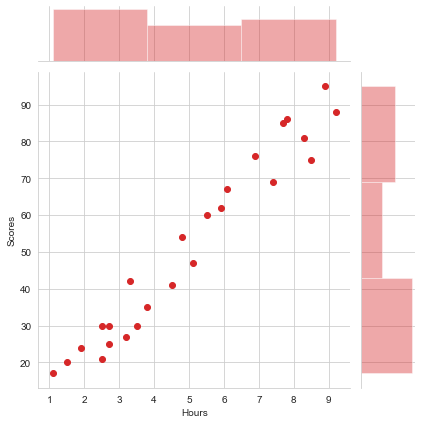

In [90]:
sns.jointplot(x='Hours',y='Scores',data=df, kind='scatter',color='tab:red')

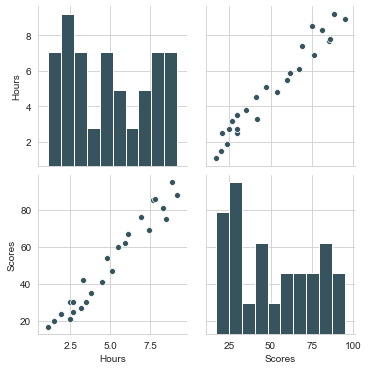

In [86]:
sns.pairplot(df)


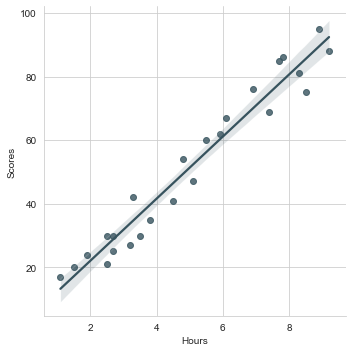

In [92]:
sns.lmplot(x='Hours',y='Scores',data=df)

In [26]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here,we can clearly see that there is a high correlation between hours and scores.

# Training and Testing Data

In [46]:
y = df['Scores']
X = df['Hours']

In [142]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


In [147]:
X.shape
y.shape
print("Shape of X :",X.shape)
print("Shape of y:",y.shape)



Shape of X : (25, 1)
Shape of y: (25,)


Using model_selection.train_test_split from sklearn to split the data into training and testing sets:

In [32]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [110]:
X_train.shape
y_train.shape
print("Shape of X_train :",X_train.shape)
print("Shape of y_train :",y_train.shape)

Shape of X_train : (20, 1)
Shape of y_train : (20,)


In [111]:
X_test.shape
y_test.shape
print("shape of X_test is:",X_test.shape)
print("shape of y_test is:",y_test.shape)

shape of X_test is: (5, 1)
shape of y_test is: (5,)


# Training the Model

In [104]:
from sklearn.linear_model import LinearRegression

In [112]:
lm = LinearRegression() #Creating an instance of a LinearRegression() model named lm

Training/fitting lm on the training data:

In [113]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

coefficients of the model:



In [118]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [9.73330705]


In [119]:
print('Intercept: \n', lm.intercept_)

Intercept: 
 2.512129298320083


In [137]:
lm.score(X_train,y_train) #checking accuracy of the train data

0.954930331163377

In [139]:
lm.score(X_test, y_test)  #checking accuracy of the test data

0.9377551740781869

Predicting Test Data:
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

Using lm.predict() to predict off the X_test set of the data.

In [115]:
predictions = lm.predict( X_test)

Creating a scatterplot of the real test values versus the predicted values:

Text(0, 0.5, 'Predicted Y')

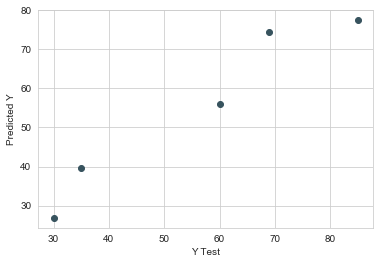

In [116]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

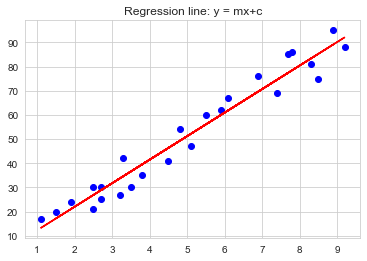

In [150]:
line = lm.coef_*X+lm.intercept_
plt.scatter(X, y,color="blue")
plt.plot(X, line,color="red")
plt.title('Regression line: y = mx+c')
plt.show()


# Evaluating the Model


In [120]:
from sklearn import metrics

In [124]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MSE: 26.675642597052235
MAE: 4.937597792467705


In [126]:
Actual_VsPred= pd.DataFrame({'Actual': y_test, 'Predicted': predictions })
Actual_VsPred

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [136]:
score_result=lm.predict([[9.25]])
print(score_result)

[92.54521954]


So, if a student studies for 9.25 hours, he/she will score 92.54% in exam.

Conclusion: Higher the no. of hours on study, higher the score students get in exam.